# Neural Network For Handwritten Digits Classification

In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [15]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [16]:
len(X_train)

60000

In [17]:
len(X_test)

10000

In [18]:
X_train.shape

(60000, 28, 28)

In [19]:
X_train[0].shape

(28, 28)

In [20]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

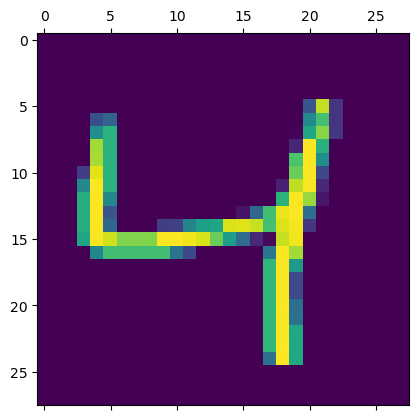

In [21]:
plt.matshow(X_train[2])

In [22]:
y_train[2]

4

In [23]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [30]:
cnn = models.Sequential([
    
    layers.Conv2D(filters=28, kernel_size=(3,3), activation="relu", input_shape=(28,28, 1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=28, kernel_size=(3,3), activation="relu", input_shape=(28,28)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(28, activation="relu"), 
    layers.Dense(10, activation="softmax")
    
])

In [31]:
cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [32]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2233 - accuracy: 0.9322
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0720 - accuracy: 0.9783
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0499 - accuracy: 0.9847
Epoch 4/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0410 - accuracy: 0.9871
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0315 - accuracy: 0.9899
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0278 - accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0226 - accuracy: 0.9929
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0199 - accuracy: 0.9936
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0167 - accuracy: 0.9944
Epoch 10/10
1875/1875 [==============================] - 26s 14m

In [33]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0347 - accuracy: 0.9897


[0.03470224887132645, 0.9897000193595886]

In [34]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 5ms/step


array([[2.21697237e-15, 2.53965116e-13, 1.53295634e-08, 6.59704043e-08,
        2.40277487e-09, 2.55887846e-12, 1.38119186e-18, 9.99999881e-01,
        8.03129299e-11, 3.90546511e-08],
       [3.73910382e-11, 5.73373189e-11, 1.00000000e+00, 2.92508422e-13,
        8.38598843e-11, 1.16335869e-20, 1.60260694e-12, 6.51864066e-12,
        9.58182333e-09, 2.63674456e-12],
       [7.65004671e-10, 9.99953508e-01, 3.14557589e-08, 1.16782792e-10,
        2.15245541e-06, 4.44760531e-08, 1.92218117e-08, 4.14299029e-05,
        2.81278221e-06, 3.68881210e-08],
       [9.99998450e-01, 8.42125713e-14, 1.81143051e-07, 3.37974149e-10,
        1.60094267e-08, 9.10847786e-12, 1.35917810e-06, 4.33365477e-09,
        3.08152188e-08, 1.30806015e-08],
       [6.21342658e-13, 2.32693309e-11, 1.49753310e-09, 6.02066303e-13,
        9.99994159e-01, 3.83282156e-11, 8.47075014e-12, 8.33834599e-11,
        1.25719724e-09, 5.81461609e-06]], dtype=float32)

In [35]:
y_labels = [np.argmax(element) for element in y_pred]
y_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [36]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [39]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    1,    1,    1,    2,    1,    1,    3,    2,    0],
       [   0, 1130,    2,    0,    0,    0,    1,    0,    2,    0],
       [   0,    1, 1023,    2,    0,    0,    1,    3,    2,    0],
       [   0,    0,    1, 1004,    0,    3,    0,    2,    0,    0],
       [   0,    0,    1,    0,  971,    0,    1,    0,    1,    8],
       [   0,    0,    0,    7,    0,  882,    1,    0,    1,    1],
       [   1,    2,    0,    0,    2,    2,  947,    0,    4,    0],
       [   0,    4,    6,    0,    0,    0,    0, 1014,    1,    3],
       [   0,    0,    1,    3,    1,    1,    1,    2,  960,    5],
       [   0,    0,    1,    1,    2,    3,    0,    3,    1,  998]])>

Text(95.72222222222221, 0.5, 'Truth')

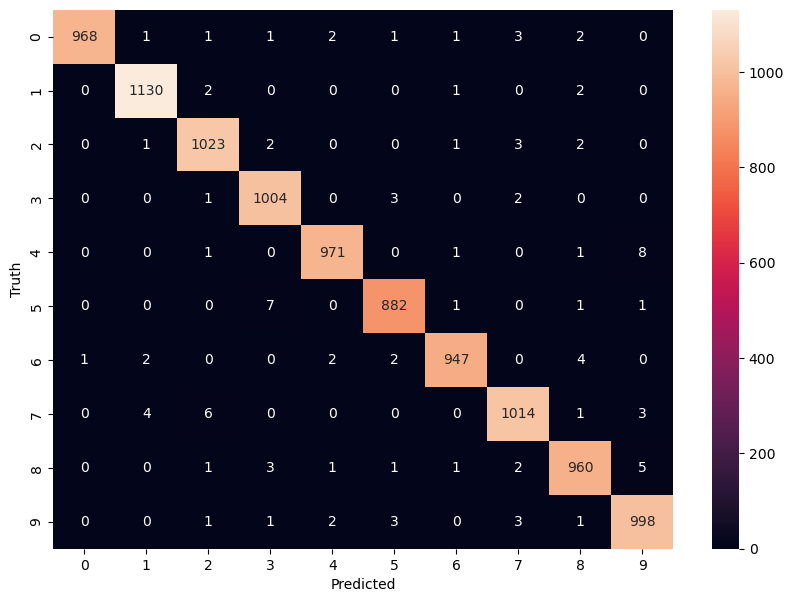

In [40]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [41]:
cnn2 = models.Sequential([
    
    layers.Conv2D(filters=20, kernel_size=(3,3), activation="relu", input_shape=(28,28, 1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(20, activation="relu"), 
    layers.Dense(10, activation="softmax")
    
])

In [42]:
cnn2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [43]:
cnn2.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2421 - accuracy: 0.9304
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0920 - accuracy: 0.9726
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0668 - accuracy: 0.9806
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0530 - accuracy: 0.9839
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0439 - accuracy: 0.9867


In [45]:
cnn2.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0482 - accuracy: 0.9842


[0.048193372786045074, 0.9842000007629395]

In [46]:
y_pred2 = cnn2.predict(X_test)
y_pred2[:5]

313/313 [==============================] - 1s 4ms/step


array([[1.4885010e-06, 8.1459416e-07, 2.7287182e-05, 1.7935676e-05,
        4.2875734e-09, 1.7743916e-09, 3.6099010e-12, 9.9994922e-01,
        7.5680492e-07, 2.5772490e-06],
       [9.7280054e-07, 6.1400056e-07, 9.9999559e-01, 3.5684597e-08,
        1.4535159e-10, 2.5014264e-09, 2.6314656e-06, 1.4397856e-14,
        2.0161266e-07, 9.8260422e-10],
       [2.0689249e-05, 9.9857616e-01, 6.8502377e-05, 1.8063243e-06,
        3.3113852e-04, 3.1200129e-06, 7.5076987e-06, 8.5389445e-04,
        1.3190937e-04, 5.3388767e-06],
       [9.9990261e-01, 1.5859903e-06, 2.8468573e-06, 2.9378899e-08,
        1.2157375e-07, 5.0663139e-08, 9.2530558e-05, 2.7255023e-08,
        2.1049404e-08, 1.9040078e-07],
       [2.3515426e-05, 4.5381751e-07, 1.2487061e-06, 1.5385787e-07,
        9.9993718e-01, 1.7332009e-09, 7.8273143e-07, 1.4558462e-08,
        9.7770737e-07, 3.5756038e-05]], dtype=float32)

In [47]:
y_labels2 = [np.argmax(element) for element in y_pred2]
y_labels2[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [48]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [49]:
cm2 = tf.math.confusion_matrix(labels = y_test, predictions = y_labels2)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    2,    0,    0,    0,    4,    1,    1,    0],
       [   0, 1130,    2,    1,    0,    0,    1,    0,    1,    0],
       [   3,    2, 1014,    1,    2,    1,    0,    7,    1,    1],
       [   0,    0,    4,  994,    0,    2,    0,    4,    5,    1],
       [   2,    0,    3,    0,  971,    0,    2,    0,    0,    4],
       [   1,    0,    1,    9,    0,  870,    6,    0,    2,    3],
       [   4,    2,    0,    1,    1,    1,  945,    0,    4,    0],
       [   1,    3,    8,    1,    0,    1,    0, 1011,    1,    2],
       [   4,    0,    4,    1,    0,    1,    2,    3,  952,    7],
       [   2,    1,    0,    3,   10,    2,    0,    6,    2,  983]])>

Text(95.72222222222221, 0.5, 'Truth')

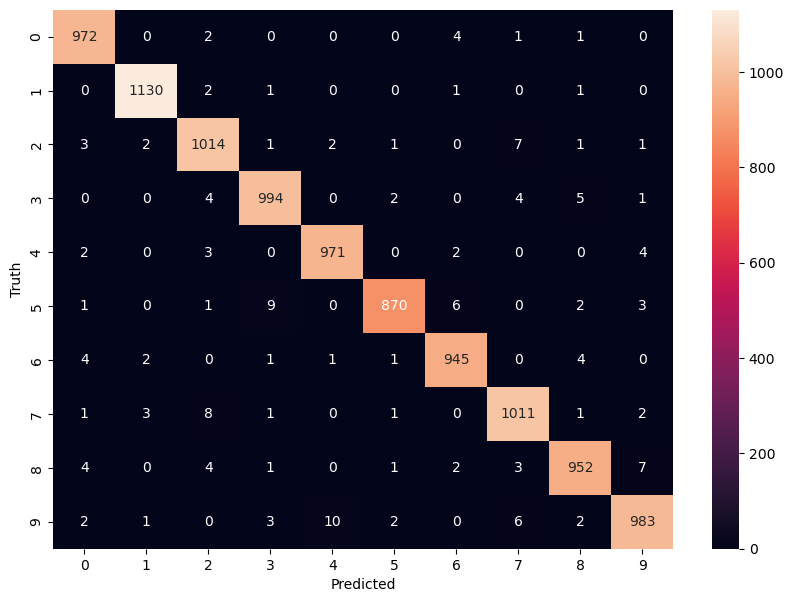

In [50]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm2, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")